Import Necessary Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Load the Dataset

In [28]:
# URL to fetch the dataset
DATA_SOURCE_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# Link to the Breast Cancer Wisconsin (Original) dataset: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

# Defining the feature names for the dataset based on the PDF description
COLUMN_HEADERS = [
    "SampleCodeNumber",           # Unique identifier for each sample (id number)
    "ClumpThickness",             # Clump thickness (1 - 10)
    "CellSizeUniformity",         # Uniformity of cell size (1 - 10)
    "CellShapeUniformity",        # Uniformity of cell shape (1 - 10)
    "MarginalAdhesion",           # Marginal adhesion (1 - 10)
    "SingleEpithelialCellSize",   # Size of single epithelial cell (1 - 10)
    "BareNuclei",                 # Bare nuclei (1 - 10)
    "BlandChromatin",             # Bland chromatin (1 - 10)
    "NormalNucleoli",             # Normal nucleoli (1 - 10)
    "Mitoses",                    # Mitoses (1 - 10)
    "Diagnosis"                   # Class label (2 for benign, 4 for malignant)
]

# Load the dataset directly from the specified URL
dataset = pd.read_csv(DATA_SOURCE_URL, header=None, names=COLUMN_HEADERS)

# Display the first few rows of the dataset to get a preview
print("Dataset Preview:")
display(dataset.head())

Dataset Preview:


,SampleCodeNumber,ClumpThickness,CellSizeUniformity,CellShapeUniformity,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
dataset.shape

(699, 11)

In [29]:
# Before running this code again make sure to reload the dataset :)

# Step 1: Replace '?' with NaN
dataset = dataset.apply(pd.to_numeric, errors='coerce')

# Step 2: Remove rows with missing values (after converting invalid entries to NaN)
rows_before = dataset.shape[0]
dataset = dataset.dropna()

# Step 3: Remove the "SampleCodeNumber" column
dataset = dataset.drop(columns=["SampleCodeNumber"])

# Step 4: Replace the "Diagnosis" values (2 for benign, 4 for malignant) with 0's and 1's
dataset["Diagnosis"] = dataset["Diagnosis"].apply(lambda x: 0 if x == 2 else 1)

# Step 5: Calculate the number of rows removed
rows_after = dataset.shape[0]
rows_removed = rows_before - rows_after

# Display the number of new rows and rows removed
print(f"Rows removed: {rows_removed}")
print(f"Rows remaining: {rows_after}")

# Display the first few rows of the cleaned dataset
dataset.head()




Rows removed: 16
Rows remaining: 683


,ClumpThickness,CellSizeUniformity,CellShapeUniformity,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Diagnosis
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0



Diagnosis Summary:
Benign (0): 444
Malignant (1): 239


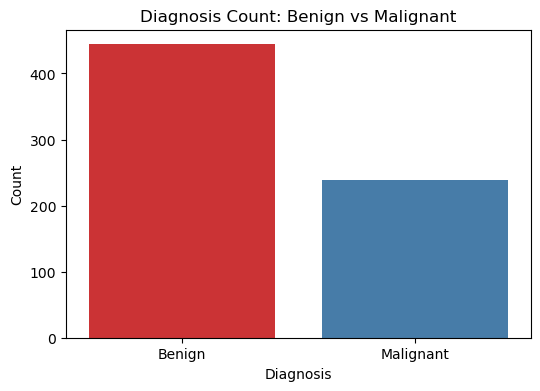

In [54]:
# Count the occurrences of benign (0) and malignant (1)
diagnosis_counts = dataset["Diagnosis"].value_counts()

# Display the count with labels for clarity
print("\nDiagnosis Summary:")
print(f"Benign (0): {diagnosis_counts.get(0, 0)}")
print(f"Malignant (1): {diagnosis_counts.get(1, 0)}")

# Visualization: Plot the counts
plt.figure(figsize=(6, 4))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette="Set1")
plt.title("Diagnosis Count: Benign vs Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Benign", "Malignant"])
plt.show()


In [43]:
# Extract the target variable 'Diagnosis' and assign it to y
y = dataset["Diagnosis"]  # Target: 'Diagnosis' (0 for benign, 1 for malignant)

# Select all other columns as features and assign them to X
X = dataset.loc[:, dataset.columns != "Diagnosis"]  # Features: all columns except 'Diagnosis'

# Display the first few rows of the features and target
print("Features (X):")
display(X.head())  # Show the first few rows of features

print("\nTarget (y):")
display(y.head())  # Show the first few rows of the target variable


Features (X):


,ClumpThickness,CellSizeUniformity,CellShapeUniformity,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1



Target (y):


0    0
1    0
2    0
3    0
4    0
Name: Diagnosis, dtype: int64

# **Step 1: Split the data into training and testing sets (70% training, 30% testing)**

In [76]:
# Split the dataset into 70% training and 30% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the resulting datasets
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

# Check the ratio of the split
train_ratio = X_train.shape[0] / X.shape[0]
test_ratio = X_test.shape[0] / X.shape[0]

print(f"Training Set ratio: {train_ratio:.2f}")
print(f"Testing Set ratio: {test_ratio:.2f}")


Training Set: 478 samples
Testing Set: 205 samples
Training Set ratio: 0.70
Testing Set ratio: 0.30


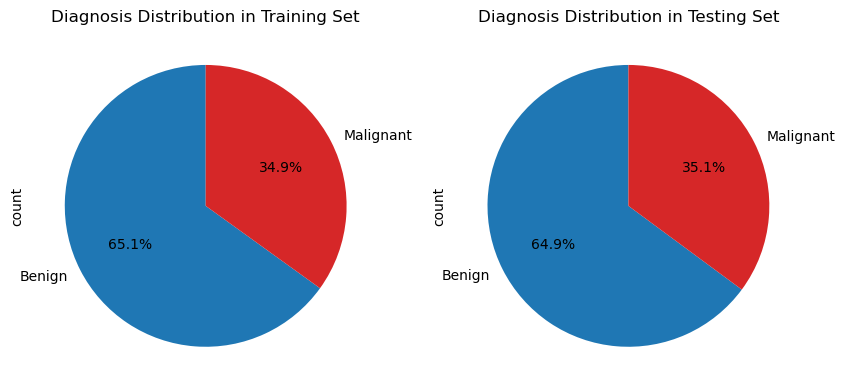

Training Set - Benign (0): 311
Training Set - Malignant (1): 167
Testing Set - Benign (0): 133
Testing Set - Malignant (1): 72


In [77]:
# Visualize the distribution of diagnosis in both training and testing sets
plt.figure(figsize=(10, 6))

# Count of benign (0) and malignant (1) in training set
plt.subplot(1, 2, 1)
diagnosis_train_counts = y_train.value_counts()
diagnosis_train_counts.plot(kind='pie', labels=["Benign", "Malignant"], colors=['#1f77b4', '#d62728'], autopct='%1.1f%%', startangle=90)
plt.title("Diagnosis Distribution in Training Set")

# Count of benign (0) and malignant (1) in testing set
plt.subplot(1, 2, 2)
diagnosis_test_counts = y_test.value_counts()
diagnosis_test_counts.plot(kind='pie', labels=["Benign", "Malignant"], colors=['#1f77b4', '#d62728'], autopct='%1.1f%%', startangle=90)
plt.title("Diagnosis Distribution in Testing Set")

plt.show()

# Print the counts for training and testing sets
print(f"Training Set - Benign (0): {diagnosis_train_counts.get(0, 0)}")
print(f"Training Set - Malignant (1): {diagnosis_train_counts.get(1, 0)}")

print(f"Testing Set - Benign (0): {diagnosis_test_counts.get(0, 0)}")
print(f"Testing Set - Malignant (1): {diagnosis_test_counts.get(1, 0)}")


Note:
The percentages shown in the pie chart (65% Benign and 35% Malignant) represent the class distribution of the dataset, not the 70/30 split of training and testing samples. The 70/30 split refers to the proportion of samples allocated to the training and testing sets, while the pie chart shows the proportion of classes (Benign vs. Malignant) in each set.  
  
Due to stratification, the class distribution (the percentage of Benign and Malignant cases) is preserved in both the training and testing sets, which is why you see the same distribution (around 65% Benign and 35% Malignant) in both the training and testing datasets. However, the 70% training set and 30% testing set allocation refers to the number of samples being split, not the class balance.

# **Step 2: Build the pipeline with StandardScaler and Logistic Regression**

In [56]:
# Build the pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Standardize the features
    ('logreg', LogisticRegression())       # Apply Logistic Regression
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Output a message confirming the model has been trained
print("Model has been trained using the pipeline.")

Model has been trained using the pipeline.


# **Step 3: Calculate the training and testing accuracy**

Training Accuracy: 97.70%
Testing Accuracy: 96.10%


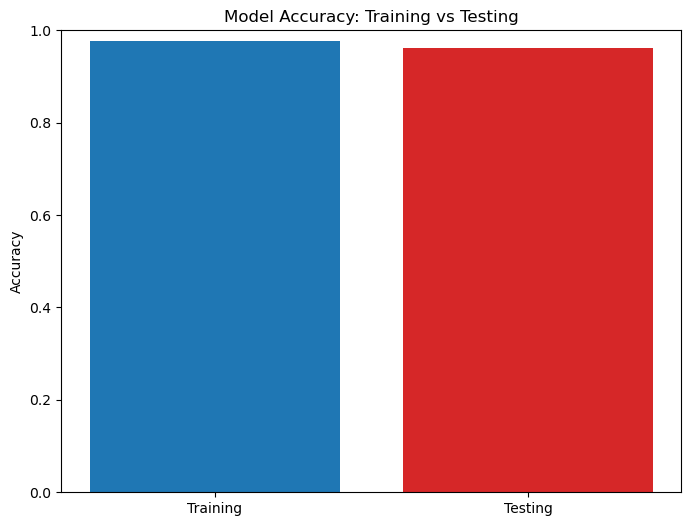

In [71]:
# Model training accuracy
train_accuracy = pipeline.score(X_train, y_train)

# Model testing accuracy
test_accuracy = pipeline.score(X_test, y_test)

# Display the training and testing accuracy
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Plotting the training and testing accuracy as a bar chart
accuracies = [train_accuracy, test_accuracy]
labels = ['Training', 'Testing']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['#1f77b4', '#d62728'])
plt.title('Model Accuracy: Training vs Testing')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


# **Step 4: Display feature importance**

In [61]:
# Extracting the logistic regression model from the pipeline
logreg = pipeline.named_steps['logreg']

# Get the feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(logreg.coef_[0])  # Absolute value of coefficients as importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance (sorted):")
display(feature_importance)


Feature Importance (sorted):


,Feature,Importance
5,BareNuclei,1.849199
0,ClumpThickness,1.198459
8,Mitoses,0.889682
2,CellShapeUniformity,0.877177
1,CellSizeUniformity,0.736751
3,MarginalAdhesion,0.676237
7,NormalNucleoli,0.494755
6,BlandChromatin,0.440015
4,SingleEpithelialCellSize,0.382828


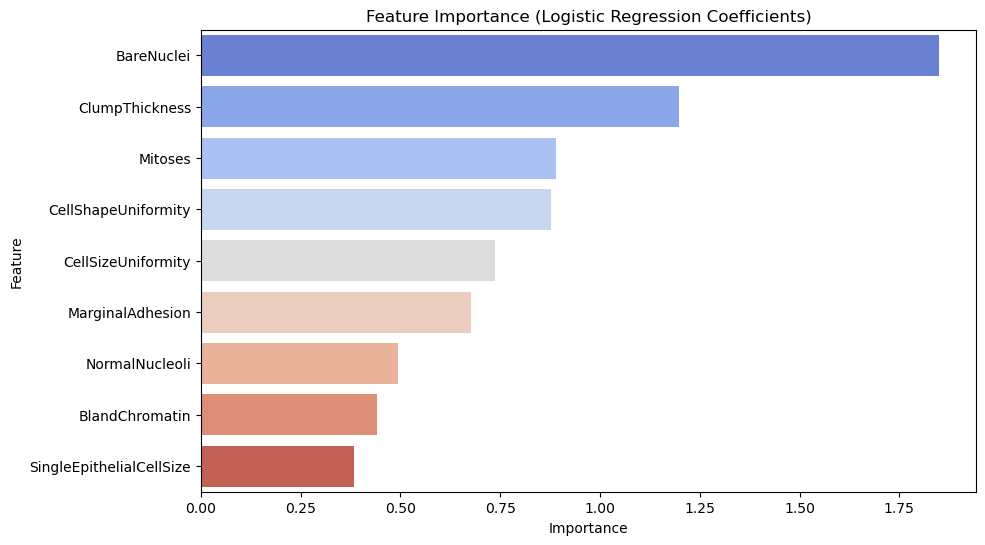

In [80]:
# Bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

# **Step 5: Generate the confusion matrix and calculate additional metrics**

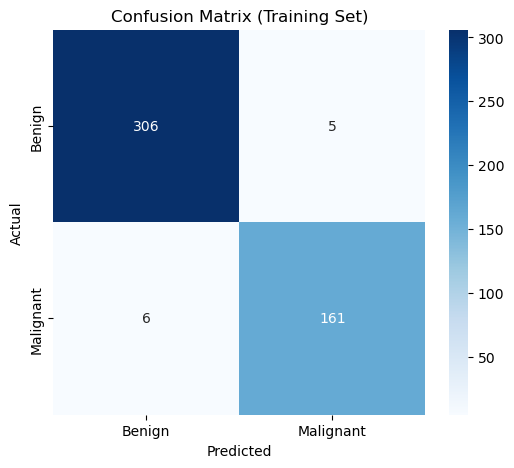

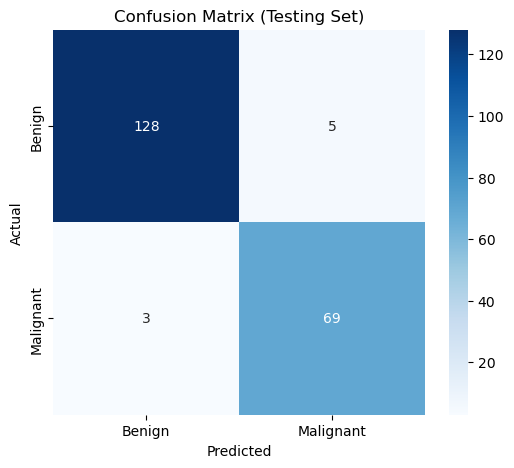

False Alarm Rate (FAR): 0.04

Classification Report:

              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.96      0.95        72

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [67]:
# Import necessary libraries for confusion matrix, metrics, and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Predict the target variable for the test set
y_pred = pipeline.predict(X_test)

# Make predictions for both training and testing sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Generate confusion matrix for both training and testing sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for the testing set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate False Alarm Rate (FAR) using the confusion matrix for test set
TN, FP, FN, TP = cm_test.ravel()  # Flatten the confusion matrix to get individual values
false_alarm_rate = FP / (FP + TN)  # Calculate FAR

# Display False Alarm Rate
print(f"False Alarm Rate (FAR): {false_alarm_rate:.2f}")

# Generate and display the classification report for the test set
classification_report_text = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("\nClassification Report:\n")
print(classification_report_text)

# **Step 6: Plot the ROC curve and calculate the AUC**

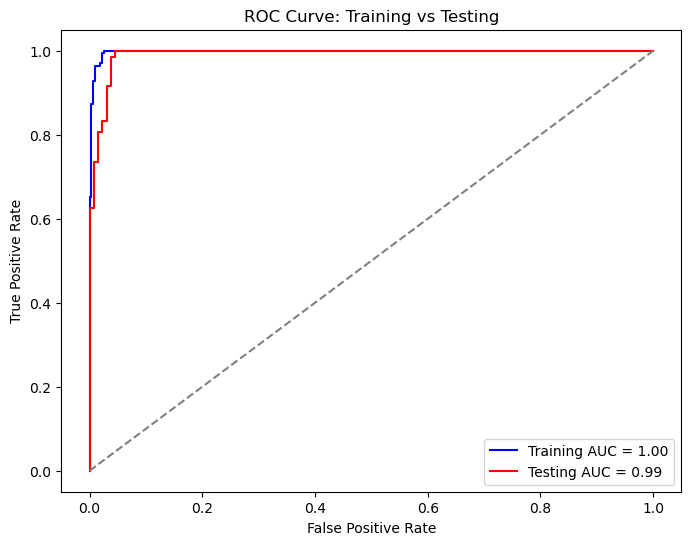


AUC for Training Data: 1.00
AUC for Testing Data: 0.99


In [68]:
# Import necessary libraries for ROC curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For training data
fpr_train, tpr_train, _ = roc_curve(y_train, pipeline.predict_proba(X_train)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# For testing data
fpr_test, tpr_test, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, color='red', label=f'Testing AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Training vs Testing')
plt.legend(loc='lower right')
plt.show()

# Display the AUC values for both datasets
print(f"\nAUC for Training Data: {roc_auc_train:.2f}")
print(f"AUC for Testing Data: {roc_auc_test:.2f}")